$\DeclareMathOperator{\d}{d}$
# Protokoll PAP2 Versuch 243: Thermisches Rauschen

Leonard Scheuer


## Motivation
In diesem Versuch soll das thermische Rauschen eines ohmschen Widerstandes vermessen und damit die Bolzmannkonstante über die Nyquist-Formel bestimmt werden.
## Grundlagen 
### Thermisches Spannungsrauschen
In jedem Leiter, von nicht verschwindener Temperatur, tritt ein Spanunnungsrauschen auf. Dieses entsteht durch die thermische (und damit ungerichtete) Bewegung der Ladungsträger. Der Zeitliche Mittelwert verschwindet daher. Um die Stärke des Rauschen zu Quantifizieren nutzen wir daher den Effektivwert der Spannung, der sich zu 
\begin{align}
U_{\mathrm{eff}} = \sqrt{\;\overline {U_r^2}\;} =\sqrt{\frac1T \int\limits_{t_0}^{t_0+T}U_r^2\mathrm dt} 
\end{align}
ergibt. Man findet, dass das Thermische Rauschen ein weißes Rauschen ist für Frequenzen bis in den THz-Bereich, alle Frequenzanteile sind also in gleichem Maße vorhanden.
Der quadratische Effektivwert ergibt sich dann (**Nyquist-Beziehung**) zu
\begin{equation}
\left\langle U_{r}^{2}\right\rangle=4 k T R \Delta f
\end{equation}
wobei $k$ die Boltzmankonstante ist und $\Delta f$ die Bandbreite des Messgeräts.  
### Messprinzip
Wir messen den Effektivwert nach der Nyquist-Formel. Wir stellen zunächst fest, dass bei einer Messbandbreite von 50kHz und bei Zimmertemperatur, ein Effektivwert von etwa $2\mu$V R, Rauschspannung vorliegt. Wir müssen also das Signal noch verstärken um auf den für das Multimeter angemessenen Millivoltbereich zu kommmen. Dies tun wir mit dem in der nachfolgenden Abb. dargestellten Aufbau.

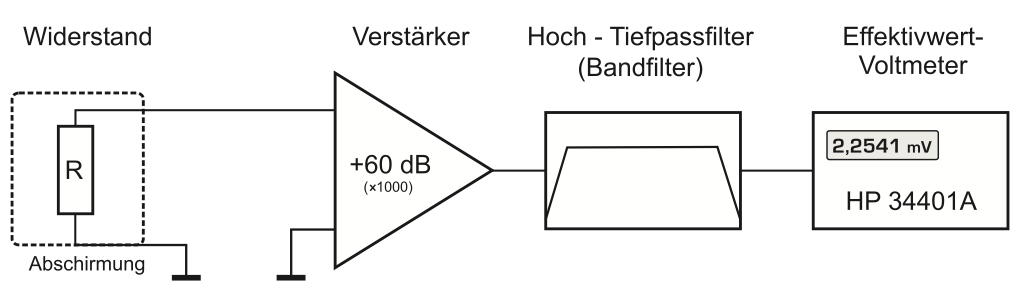
Abb.1: Messaufbau (Quelle:Script)

Wir nutzen den Bandfilter um ein möglichst definiertes Frequenzband zu erhalten und Störsignale zu entfernen. Da der Verstärker auch ein Rauschen aufweißt, muss dieses bei der Messung abgezogen werden. Der Frequenzgang der Messelektronik ist als
\begin{equation}
g(f)=\left. \frac{U_{a u s}}{U_{e i n}}\right|_{f}
\end{equation}
definiert. Wir schreiben die Nyquist-Beziehung entsprechend in Integralform um:
\begin{equation}
\left\langle U_{a u s}^{2}\right\rangle=4 k T R \int_{0}^{\infty} g(f)^{2} d f \equiv 4 k T R B
\end{equation}
Wobei 
\begin{equation}
B=\int_{0}^{\infty} g(f)^{2} d f
\end{equation}
die sogenannte äquivalente Rauschbandbreite ist.
Ziehen wir das Rauschen des Verstärkers ab und stellen zu Boltzmankonstante um, so erhalten wir:
\begin{equation}
k=\frac{\left\langle U_{a u s}^{2}\right\rangle-\left\langle U_{V}^{2}\right\rangle}{4 T R B}
\end{equation}
Wollen wir nun $B$ bestimmen, so müssen wir dafür den Frequenzgang messen. Dafür wird ein Funktionengenerator mit Dämpfungsglied der Dämpfung $D$ an den Messapperat angeschlossen, sodass die Signale etwa im gleichen Spannungsbereich wie die gemessenen Rauschsignale sind. Der Aufbau ist in der Abbildung 2 dargestellt.

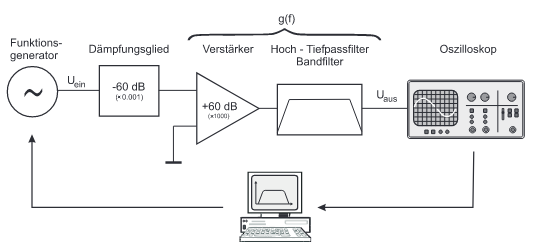

Abb.2: Aufbau zur Messung des Frequenzganges  (Quelle:Script)

Wir erhalten daraus dann den Frequenzgang mit
\begin{equation}
g(f)=\frac{1}{D} \frac{\sqrt{\left\langle U_{a u s}^{2}\right\rangle}}{\sqrt{\left\langle U_{e i n}^{2}\right\rangle}}
\end{equation}

## Material
- Batterienetzteil
- Zimmerthermometer
- Verschiedene ohmsche Widerstände in einem gemeinsamen Gehäuse montiert (Fehler <0,5%)
- Rauscharmer Verstärker mit 1000-facher Verstärkung (60 dB) und zuschaltbarem Bandpassfilter
- Dämpfungsglied 1/1000-fach (-60dB)
- Oszilloskop mit Spektrumanalysator
- Funktionsgenerator
- Multimeter Agilent HP34401A (Fehler 0,3%)
- PC

## Versuche/Durchführung

### 1. Vorversuch: Qualitative Untersuchung des Rauschspektrums
Mit verschiedenen Widerständen wird das Rauschsignal im Spektrumsanalysator des Oszilloskopes betrachtet, verifiziert, dass es sich um ein weißes Rauschen handelt. Dabei werden verschiedene Frequenzbereiche betrachtet, wobei zunachst der durch den Verstärker verursachten Abfall bei höheren Frequenzen sichtbar wird. Anschließend wird der Bandfilter zugeschaltet und der Effekt betrachtet.

### 2. Messung der Rauschspannung als Funktion des ohmschen Widerstands 

- Mit dem Programm "Effektivwert" wird der Effektivwert der direkt am Verstärker befestigten Wiederstände im Bereich von 5 kΩ bis 30 kΩ in Schritten von 5 kΩ gemessen. Es werden über je über 100 Messungen die Mittelwerte mit Fehler notiert. 
- Das Eigenrauschen des Verstärkers wird mit dem Kurzschlussstecker auf gleiche Art gemessen.

### 3. Messung des Frequenzgangs des Verstärkers und des Bandfilters
Die Schaltung gem. Abb. 4 wird mit möglichst wenig Kabel aufgebaut und der Frequenzgang mit dem "Circuit-Analyzer" des Oszilloskops aufgenommen. 

## Messprotokoll
siehe Anhang (inklusive Bilder)

## Auswertung

### Graphische Darstellung der Messdaten
Wir importieren den gemessenen Frequenzgang und stellen ihn graphisch dar. Wir benutzen Gl. (7) um $g(f)$ zu erhalten. Wir schneiden die Randbereiche ab, da dort die Auflösungsgrenze des Oszilloskops erreicht ist. 



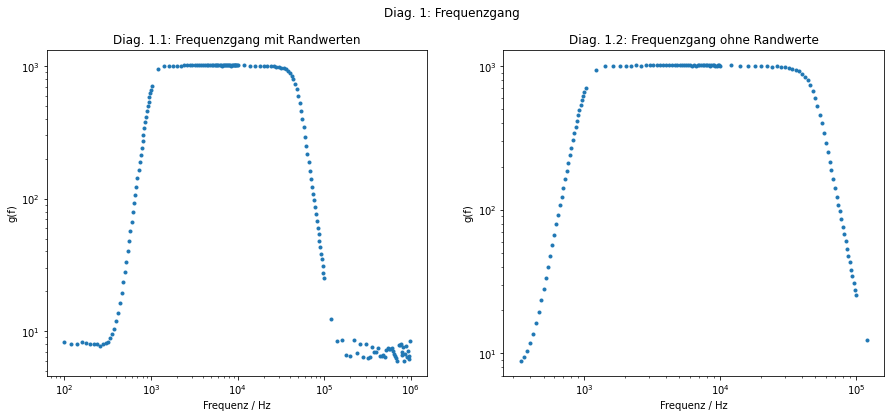

In [87]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
import numpy as np
from IPython.display import Markdown, Latex, display
import pandas as pd
from scipy.optimize import curve_fit
import uncertainties
from uncertainties import ufloat as uf
from uncertainties.umath import *
from uncertainties import unumpy as unp
from uncertainties.unumpy import (nominal_values as noms,
                                  std_devs as stds)


def out(name,c,unit="",zp=0,decimals=2):
    if isinstance(c, uncertainties.UFloat):
        display(Markdown("$"+name+" = " +'({:L})'.format(c)+" \   \mathrm{"+unit+"}$"))
    elif type(c) in [float,int,np.float64]:
        display(Markdown("$"+name+" = " +"{:.{}f}".format(round(c*10**(-zp),decimals),decimals)+unit+"$"))
    else:
        print(c)
        
def fit_line(x, m, n): 
    return m * x + n 
def fit_propline(x, m): 
    return m * x  

def quad_add(arr):
    quad_sum=0
    for i in arr:
        quad_sum+=i**2
    return (quad_sum**0.5)/len(arr)

f, U_aus =np.loadtxt("frequenzgang.txt", skiprows=1, usecols=(0,1), unpack=True)
D=uf(1e-3,1e-3*0.002)
U_ein=200 #[mV]
g=U_aus/(U_ein * D)

fig, (plt1, plt2) = plt.subplots(1, 2)
fig.set_size_inches(15,6)
fig.suptitle("Diag. 1: Frequenzgang")

plt1.loglog(f,noms(g), linestyle="None", marker=".")
plt1.set_xlabel("Frequenz / Hz")
plt1.set_ylabel("g(f)")
plt1.set_title("Diag. 1.1: Frequenzgang mit Randwerten")

plt2.loglog(f[12:-43],noms(g)[12:-43], linestyle="None", marker=".")
plt2.set_xlabel("Frequenz / Hz")
plt2.set_ylabel("g(f)")
_=plt2.set_title("Diag. 1.2: Frequenzgang ohne Randwerte")


### Funktion anpassen
Wir fitten nun eine Funktion der Form
\begin{equation}
g(f)=\frac{V}{\sqrt{1+1 /\left(f / \Omega_{1}\right)^{2 n_{1}}} \sqrt{1+\left(f / \Omega_{2}\right)^{2 n_{2}}}}
\end{equation}
Wobei $V$ die Verstärkung, $\Omega_1, \Omega_2 $ die Grenzfrequenzen des Bandfilters und $n_1,n_2$ die Filterordnungen sind.


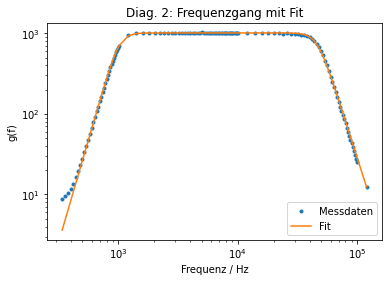

In [88]:
def fit_func(f,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))

p0 = [1000 , 1000 , 50000 , 4 ,4]
popt_g, pcov_g = curve_fit(fit_func, f[12:-43],noms(g)[12:-43],p0)

fig, ( plt2) = plt.subplots(1, 1)
plt2.loglog(f[12:-43],noms(g)[12:-43], linestyle="None", marker=".", label="Messdaten")
plt2.loglog(f[12:-43], fit_func(f[12:-43], *popt_g), label="Fit")
plt2.set_xlabel("Frequenz / Hz")
plt2.set_ylabel("g(f)")
plt2.legend()
_=plt2.set_title("Diag. 2: Frequenzgang mit Fit")

### Numerische Integration

Wir wollen nun das $B$ aus Gleichung (5) numerisch berechen:

In [107]:
import scipy.integrate as integrate

def fit_func_square(f,V,W1,W2,n1,n2):
    return fit_func(f,V,W1,W2,n1,n2)**2

Bn , Bs =integrate.quad(fit_func_square, f[12], f[-43], args=tuple(popt_g))
B=uf(Bn, np.sqrt(Bs))
out("B",B,"Hz")

$B = (47363308601.28 \pm 0.32) \   \mathrm{Hz}$

### Berechnung der Boltzmann-Konstanten
Wir berechen die Boltzmannkonstante indem wir zunächst die Differenz 
\begin{equation}
\begin{aligned}
D &=\left(U_{a u s}^{2}-U_{V}^{2}\right) \\
\Delta D &=\sqrt{\left(2 U_{a u s} \Delta U_{a u s}\right)^{2}+\left(2 U_{V} \Delta U_{V}\right)^{2}}
\end{aligned}
\end{equation}
gegen den Widerstand auftragen. Wir fitten eine Gerade um die Stiegung $c$ zu erhalten, welche nach der Nyquist-Beziehung gerade
\begin{align}
c=4kTB
\end{align}
ist. Dann ist 
\begin{align}
k=\frac{c}{4TB}
\end{align}
Wobei sich die Fehler zu
\begin{equation}
\begin{aligned}
&\Delta k_{\text {stat }}=\sqrt{\left(\frac{\Delta c}{c}\right)^{2}+\left(\frac{\Delta T}{T}\right)^{2}} \\
&\Delta k_{s y s}=k \cdot \frac{\Delta B}{B}
\end{aligned}
\end{equation}
ergibt. Vereinfachend durften wir für $B$ einen relativen Fehler von 2% annehmen. 

Wir beurteilen die Güte des Fits anhand der $\chi^2$-Summe
\begin{equation}
\begin{gathered}
\chi^{2}=\sum_{i}^{N}\left(\frac{y_{i}-x_{i}}{\Delta y_{i}}\right)^{2}=\sum_{i}^{N}\left(\frac{y_{i}-x_{i}}{\sqrt{\left(\Delta f_{i}\right)^{2}+\left(b \cdot \Delta x_{i}\right)^{2}}}\right)^{2} \\
\chi_{\text {red }}^{2}=\chi^{2} / d o f
\end{gathered}
\end{equation}
wobei die $y_i$ die Funktionswerte und die $x_i$ die Messwerte sind. Schließlich berechnen wir die Fitwahrscheinlichkeit, also dass bei einer Wiederholungsmessung ein größerer oder gleicher $\chi^2$-Wert erhalten wird. Zum Schluss bestimmen wir noch die Abweichung vom Lieraturwert.

$\chi^2 = 1.01$

$\chi^2_{red} = 0.20$

$\text{Fitwahrscheinlichkeit} = 96.00\%$

$ k = ( 1.459 \pm 0.030\text{ syst.} \pm 0.001\text{ stat.} )10^{ -23 }  J/K $

$\sigma_{k,lit} = 2.68$

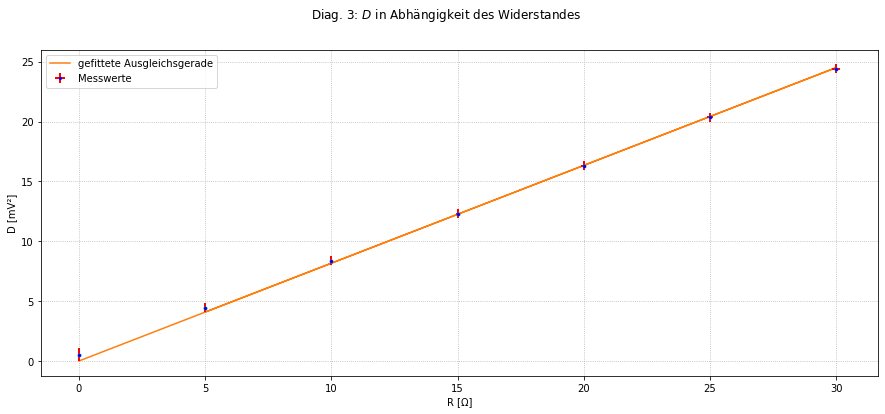

In [108]:
df=pd.read_csv("rauschen.csv")
U_v=float(df.loc[df["R"]==0,"µ [mV]"])
D_U_v=float(df.loc[df["R"]==0,"∆µ [mV]"])
df["D [mV]"]=df["µ [mV]"]**2-U_v
df["∆D [mV]"]=np.sqrt((2*df["µ [mV]"]* df["∆µ [mV]"])**2+(2*U_v*D_U_v)**2)

popt, pcov = curve_fit(fit_propline, df["R"],df["D [mV]"], sigma = np.sqrt(quad_add([df["∆R"],df["∆D [mV]"]])))

chisquare=np.sum(((fit_propline(df["R"],*popt)-df["D [mV]"])**2/df["D [mV]"]**2))     
dof=5 #degrees of freedom, Freiheitsgrad
chisquare_red=chisquare/dof
out("\\chi^2",chisquare,"")

out("\\chi^2_{red}",chisquare_red,"")
    
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare,dof),2)*100
#print("Wahrscheinlichkeit="+prob+"%")


fig, (plt1) = plt.subplots(1, 1)
plt1.errorbar(df["R"], df["D [mV]"], yerr=df["∆D [mV]"], xerr=df["∆R"],  fmt=".")

fig.suptitle('Diag. 3: $D$ in Abhängigkeit des Widerstandes') 
fig.set_size_inches(15,6)
#fig.set_dpi(diag_dpi)
plt1.grid(ls='dotted')
plt1.plot(df["R"], fit_propline(df["R"], *popt),label="gefittete Ausgleichsgerade") 

plt1.errorbar(df["R"], df["D [mV]"], yerr=df["∆D [mV]"], xerr=df["∆R"], fmt = '.b',markersize=4, capsize = 0, ecolor="r",  elinewidth=2, label="Messwerte")
_=plt1.set(ylabel='D [mV²]', xlabel='R [Ω]')
_=plt1.legend() 


out("\\text{Fitwahrscheinlichkeit}",prob,"\\%")

T=uf(273.15+22.4,0.2)
m=uf(popt[0],pcov[0][0])
k_wstat=(m*10**-9)/(4*T*B.n)
k=[k_wstat.n,k_wstat.n*(0.02),k_wstat.s]

def round_up(n, decimals = 0):  
    multiplier = 10 ** decimals  
    return np.ceil(n * multiplier) / multiplier 

def out_sys_std(name,c,zp=0,decimals=0,unit=""):
    if zp==0:
        pass
        display(Markdown( "$ "+name+" = ( " +"{:.{}f}".format(round(c[0]*10**(-zp),decimals), decimals)+" \pm "+"{:.{}f}".format(round_up(c[1]*10**(-zp),decimals), decimals)+ "\\text{ syst.}" +" \pm "+ "{:.{}f}".format(round_up(c[2]*10**(-zp),decimals), decimals)+"\\text{ stat.}" +" ) " + unit + " $"))
    else:
        display(Markdown( "$ "+name+" = ( " + "{:.{}f}".format(round(c[0]*10**(-zp),decimals),decimals)+" \pm "+"{:.{}f}".format(round_up(c[1]*10**(-zp),decimals), decimals)+ "\\text{ syst.}"+" \pm "+"{:.{}f}".format(round_up(c[2]*10**(-zp),decimals), decimals)+"\\text{ stat.}"+" )10^{ "+str(zp)+" }  " + unit + " $"))
        
out_sys_std("k",k,-23,3,"J/K")

k_lit=1.380649e-23
sig=(k[0]-k_lit)/np.sqrt(k[1]**2+k[2]**2)
out("\\sigma_{k,lit}",sig)

Wir sehen, dass der systematische Fehler von $k$ deutlich größer als der der statistische ist. Das Ergebnis unterscheidet sich nicht signifikant von Literaturwert. Der $\chi^2_{red}$-Wert sollte eigentlich bei etwa 1 liegen ist also hier eigentlich zu klein. Wir erhalten eine gute Fitwahrscheinlichkeit. 

## Diskussion
Die Boltzmannkonstante, welche wir aus dem thermischen Rauschen von Widerständen errechenet haben, weicht nicht signifikant vom Literaturwert ab ($<2,7\sigma$). Der Statistische Fehler ist gegenüber dem systematischen zu vernachlässigen. Dieser ist jedoch einfach durch die Anleitung gegeben geworden, eine weitere Fehlerbetrachtung von diesem daher also schwer möglich. 